In [64]:
from pint import UnitRegistry
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
path = r'https://en.wikipedia.org/wiki/Estimates_of_historical_world_population'
r = requests.get(path)

In [62]:
table2 = pd.read_html(r.content)[2]
table2.columns = ['year','census', 'prb', 'un', 'maddison',
                'hyde', 'tanton', 'biraben', 'mj',
                'thomlinson', 'durand', 'clark']
table2.head()

,year,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
0,1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1,1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: xlabel='year', ylabel='un'>

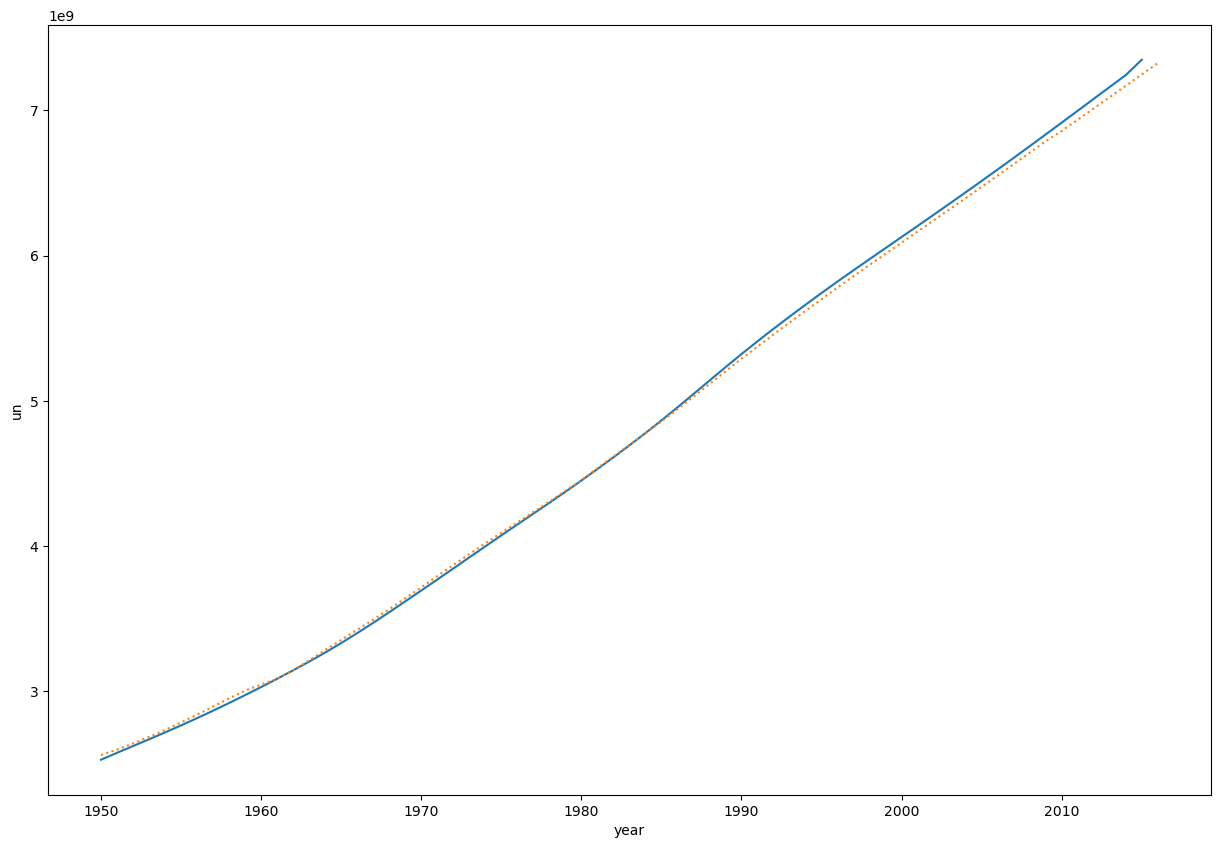

In [75]:
fig, ax = plt.subplots(figsize=[15,10])

sns.lineplot(x='year', y='un', data=table2, ax=ax)
sns.lineplot(x='year', y='census', data=table2, ax=ax, linestyle=':')

<Axes: >

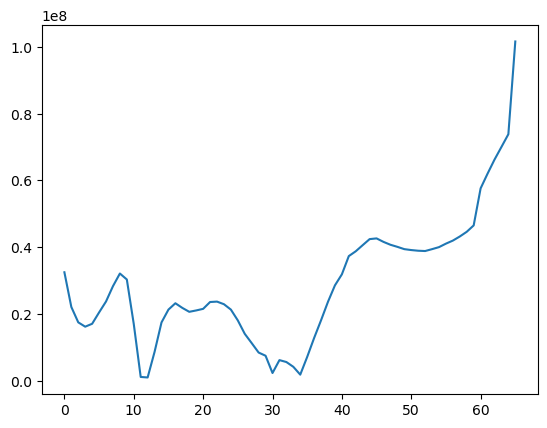

In [77]:
np.abs(table2['un']-table2['census']).plot()

In [81]:
end = table2.index[-1]
start = table2.index[0]

delta_t = table2.loc[end, 'year'] - table2.loc[start, 'year']
tot_growth = table2.loc[end, 'census'] - table2.loc[start, 'census']

annual_growth = tot_growth/delta_t
annual_growth

72248000.83333333

In [82]:
start_pop = table2.loc[start, 'census']

table2['yhat'] = start_pop + table2.index * annual_growth

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: xlabel='year', ylabel='un'>

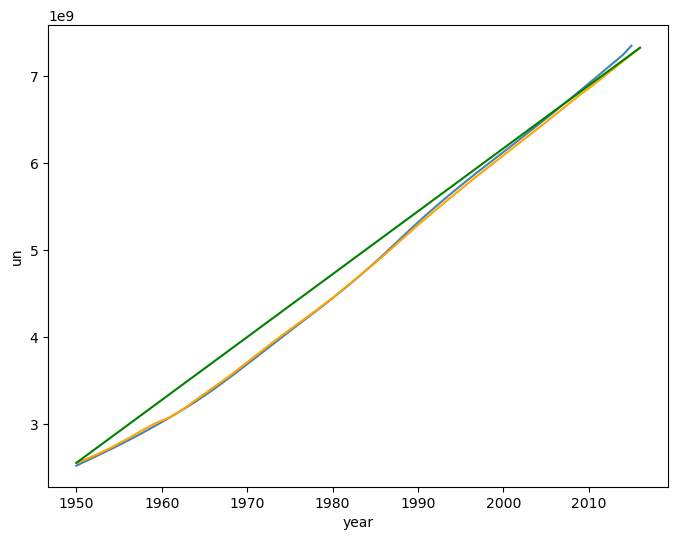

In [86]:
fig, ax = plt.subplots(figsize=[8,6])

sns.lineplot(x='year', y='un', data=table2, ax=ax, color='steelblue')
sns.lineplot(x='year', y='census', data=table2, ax=ax, color='orange')
sns.lineplot(x='year', y='yhat', data=table2, ax=ax, color='green')

In [91]:
death_rate = 7.7/1000
birth_rate = 25/1000
prev = None

for n in table2.index:
    if not prev:
        table2.loc[n, 'yhat'] = start_pop
    else:
        table2.loc[n, 'yhat'] = prev - death_rate*prev + birth_rate*prev
    prev = table2.loc[n, 'yhat']

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: xlabel='year', ylabel='un'>

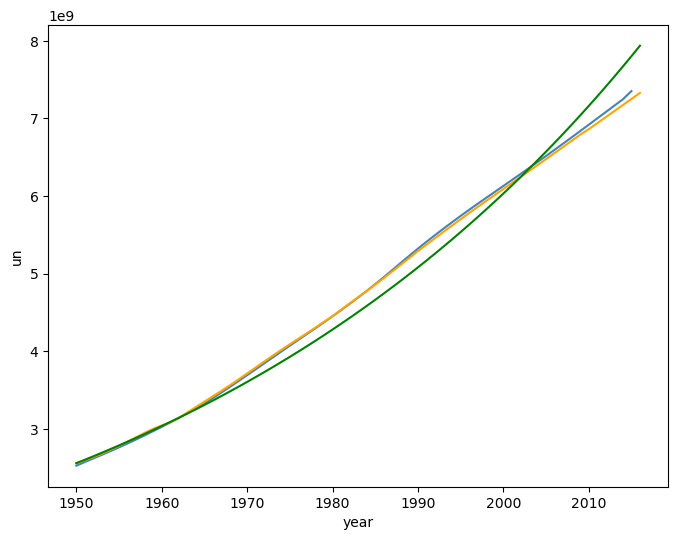

In [92]:
fig, ax = plt.subplots(figsize=[8,6])

sns.lineplot(x='year', y='un', data=table2, ax=ax, color='steelblue')
sns.lineplot(x='year', y='census', data=table2, ax=ax, color='orange')
sns.lineplot(x='year', y='yhat', data=table2, ax=ax, color='green')